# 機器學習與深度學習實作：Fundamental of Classification, part 1
## 課程練習(Homework week 06~07)

### 姓名（Name）：陳嬿伃
### 學號（Student ID）：o902108008

## 第一部分：教學及教材的實作
## Task I: Hands On Practice

### 請就實體課程，線上教學，教材等提到的實作，依序於此實際動手寫程式並執行，就結果討論。
### refer "Fundamental of Classification.pdf" and complete hands on practices page. 22~26.

## Naïve Bayes Classifier: The Iris Dataset

### The Iris Dataset (1/3)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
for key,value in iris.items():
    try:
        print(key,value.shape)
    except:
        print(key)
print(iris['feature_names'])

data (150, 4)
target (150,)
target_names (3,)
DESCR
feature_names
filename
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### The Iris Dataset (2/3)

In [2]:
print(iris.data)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### The Iris Dataset (3/3)

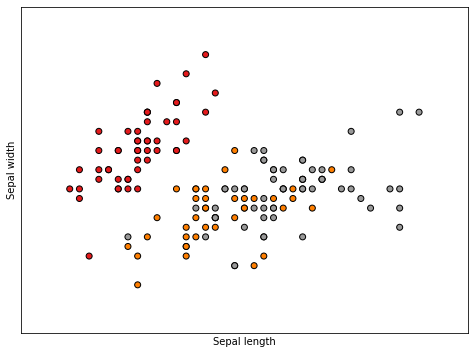

In [19]:
#畫圖看資料狀況
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

#import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] #只用首2個feature
y = iris.target

x_min, x_max = X[:,0].min() - .5,X[:, 0].max() +.5
y_min, y_max = X[:,1].min() - .5,X[:, 1].max() +.5

plt.figure(2, figsize=(8,6))
plt.clf()

#plot the training points
plt.scatter(X[:, 0],X[:, 1], c=y, cmap = plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

###  Let’s do it (page 58)

In [21]:
#用naive bayes分類結果(跟WeKa概念一樣)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
model = MultinomialNB()
model.fit(X_train, y_train) #fit是用來預測
#model.score(X_test, y_test)

#make predictions
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted)) #要有正確答案&預測結果，才能知道預測成果對

print("Accuracy: {0}".format(metrics.accuracy_score(expected, predicted)))

print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.64      1.00      0.78         9
           2       1.00      0.62      0.76        13

    accuracy                           0.83        30
   macro avg       0.88      0.87      0.85        30
weighted avg       0.89      0.83      0.83        30

Accuracy: 0.8333333333333334
[[8 0 0]
 [0 9 0]
 [0 5 8]]


###  N-fold Cross Validation (page 59)

In [22]:
### N-fold Cross Validation
import numpy as np
from sklearn.model_selection import KFold

iris = datasets.load_iris()
classifier = MultinomialNB()
kF = KFold(n_splits=3)

for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    # make predictions
    expected = y_test
    predicted = classifier.predict(x_test)
    print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      50.0
   macro avg       0.00      0.00      0.00      50.0
weighted avg       0.00      0.00      0.00      50.0

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00      50.0
   macro avg       0.00      0.00      0.00      50.0
weighted avg       0.00      0.00      0.00      50.0

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00      50.0
   macro avg       0.00      0.00      0.00      50.0
weighted avg       0.00      0.00      0.00      50.0



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-pac

### We need randomize dataset (page 60)
將 dataset shuffle 後，於此重做前一題 N-fold cross validation。

In [23]:
### We need randomize dataset
import numpy as np
from sklearn.model_selection import KFold

iris = datasets.load_iris()
classifier = MultinomialNB()
kF = KFold(n_splits=3, shuffle=True)

for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    # make predictions
    expected = y_test
    predicted = classifier.predict(x_test)
    print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.40      0.57        20
           2       0.59      1.00      0.74        17

    accuracy                           0.76        50
   macro avg       0.86      0.80      0.77        50
weighted avg       0.86      0.76      0.74        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.47      0.64        17
           2       0.59      1.00      0.74        13

    accuracy                           0.82        50
   macro avg       0.86      0.82      0.79        50
weighted avg       0.89      0.82      0.81        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.42      1.00      0.59        13
           2       1.00      0.10      0.18        20

    accuracy        

### The Performance: Macro- and Micro- average (page 61, 62)

In [24]:
### Macro- and Micro- average
import numpy as np
from sklearn.model_selection import KFold

iris = datasets.load_iris()
classifier = MultinomialNB()
kF = KFold(n_splits=3, shuffle=True)

predicted = []
expected = []
for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
#    print(y_train)
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    expected.extend(y_test)
    predicted.extend(classifier.predict(x_test))
    
print(metrics.classification_report(expected, predicted))
print("Macro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='macro'),
    metrics.recall_score(expected, predicted, average='macro'),
    metrics.f1_score(expected, predicted, average='macro'))
     )
print("Micro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='micro'),
    metrics.recall_score(expected, predicted, average='micro'),
    metrics.f1_score(expected, predicted, average='micro'))
     )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.87      0.78      0.82        50
           2       0.80      0.88      0.84        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Macro-Avg PRF: 0.888888888888889, 0.8866666666666667, 0.8863826232247285
Micro-Avg PRF: 0.8866666666666667, 0.8866666666666667, 0.8866666666666667


## k-Nearest Neighbor

### Prepare dataset (page 67)

In [8]:
from numpy import *
import matplotlib.pyplot as plt

def createDataset():
    group = array([[1.0, 1.1], [1.0, 1.0], [0.0, 0.0], [0.0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

def pltData(dataset):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    idx = 0
    for point in dataset:
        if labels[idx] =='A':
            ax.scatter(point[0], point[1], c='blue', marker='o', linewidth=0, s=300)
            plt.annotate("(" + str(point[0]) + "," + str(point[1]) + ")", xy=(point[0], point[1]))
        else:
            ax.scatter(point[0], point[1], c='red', marker='^', linewidth=0, s=300)
            plt.annotate("(" + str(point[0]) + "," + str(point[1]) + ")", xy=(point[0], point[1]))
        idx += 1
    plt.show()

### Data Distribution (page 68)

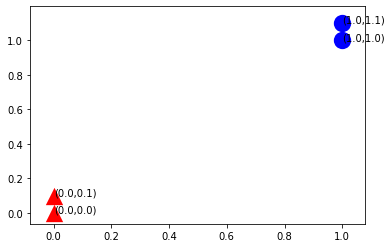

In [9]:
dataset, labels = createDataset()
pltData(dataset)

### The Algorithm (page 69)

In [10]:
import operator

def cosDist(vec1, vec2):
    numerator = dot(vec1, vec2)
    denominator = (linalg.norm(vec1) * linalg.norm(vec2))
    if numerator == 0 or denominator == 0:
        return 0
    else:
        return numerator / denominator
    
def euclideanDistance(vec1, vec2):
    vector1 = mat(vec1)
    vector2 = mat(vec2)
    return sqrt((vector1 - vector2) * (vector1 - vector2).T)
    
def classify(testData, trainingData, listClasses, k):
    dataSetSize = trainingData.shape[0]
    distances = array(zeros(dataSetSize))
    for idx in range(dataSetSize):
        distances[idx] = euclideanDistance(testData, trainingData[idx])
    sortedDistIndicies = argsort(distances)
    classCount={}
    for i in range(k):
        votedLabel = listClasses[sortedDistIndicies[i]]
        classCount[votedLabel] = classCount.get(votedLabel, 0) + 1
        
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

## Prediction (page 70)

In [11]:
dataset, listClasses = createDataset()
testData = [0.2, 0.2]

print(classify(testData, dataset, listClasses, 3))

B


## Scikit-Learn_kNN for IRIS dataset (page 71, 72)

In [20]:
### Scikit-Learn_kNN for IRIS dataset
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier ###主要改這行
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
classifier = KNeighborsClassifier() ###主要改這行
kF = KFold(n_splits=3, shuffle=True)

predicted = []
expected = []
for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
#    print(y_train)
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    expected.extend(y_test)
    predicted.extend(classifier.predict(x_test))
    
print(metrics.classification_report(expected, predicted))
print("Macro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='macro'),
    metrics.recall_score(expected, predicted, average='macro'),
    metrics.f1_score(expected, predicted, average='macro'))
     )
print("Micro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='micro'),
    metrics.recall_score(expected, predicted, average='micro'),
    metrics.f1_score(expected, predicted, average='micro'))
     )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Macro-Avg PRF: 0.9677505687140372, 0.9666666666666667, 0.9666366396423447
Micro-Avg PRF: 0.9666666666666667, 0.9666666666666667, 0.9666666666666667


## Scikit-Learn_Decision Tree for IRIS dataset (page 95, 96)

In [13]:
### Scikit-Learn_Decision Tree for IRIS dataset
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier ###主要改這行
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
classifier = DecisionTreeClassifier() ###主要改這行
kF = KFold(n_splits=3, shuffle=True)

predicted = []
expected = []
for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
#    print(y_train)
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    expected.extend(y_test)
    predicted.extend(classifier.predict(x_test))
    
print(metrics.classification_report(expected, predicted))
print("Macro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='macro'),
    metrics.recall_score(expected, predicted, average='macro'),
    metrics.f1_score(expected, predicted, average='macro'))
     )
print("Micro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='micro'),
    metrics.recall_score(expected, predicted, average='micro'),
    metrics.f1_score(expected, predicted, average='micro'))
     )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.87      0.94      0.90        50
           2       0.93      0.86      0.90        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

Macro-Avg PRF: 0.9350509930220076, 0.9333333333333332, 0.9332264957264957
Micro-Avg PRF: 0.9333333333333333, 0.9333333333333333, 0.9333333333333333


### Visualize result via graphviz (1/2) (page 97, 98)

In [14]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


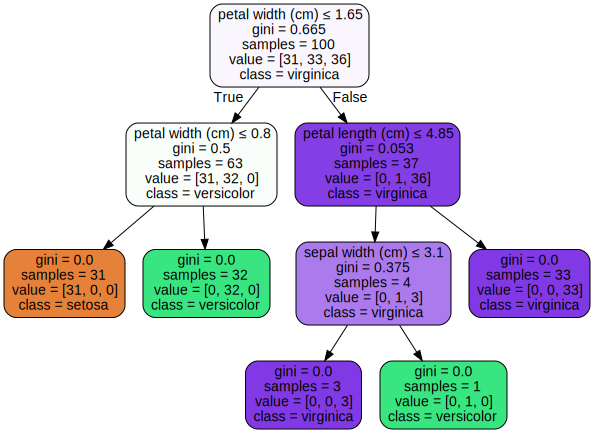

In [15]:
### Visualize result via graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, #classifier是上面做的訓練結果
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True)
qragh = graphviz.Source(dot_data)
qragh

###  Scikit-Learn_Logistic Regression for IRIS dataset (page 106, 107)

In [16]:
### Scikit-Learn_Logistic Regression for IRIS dataset
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression ###主要改這行
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
classifier = LogisticRegression() ###主要改這行
kF = KFold(n_splits=3, shuffle=True)

predicted = []
expected = []
for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
#    print(y_train)
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    expected.extend(y_test)
    predicted.extend(classifier.predict(x_test))
    
print(metrics.classification_report(expected, predicted))
print("Macro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='macro'),
    metrics.recall_score(expected, predicted, average='macro'),
    metrics.f1_score(expected, predicted, average='macro'))
     )
print("Micro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='micro'),
    metrics.recall_score(expected, predicted, average='micro'),
    metrics.f1_score(expected, predicted, average='micro'))
     )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Macro-Avg PRF: 0.9618894256575415, 0.96, 0.9599358974358975
Micro-Avg PRF: 0.96, 0.96, 0.96


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

### Scikit-Learn_SVM for IRIS dataset (page 132, 133, 134)

In [17]:
### Scikit-Learn_SVM for IRIS dataset
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC ###主要改這行
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
classifier = SVC() ###主要改這行
kF = KFold(n_splits=3, shuffle=True)

predicted = []
expected = []
for train_index, test_index in kF.split(iris.data):
    x_train = np.array(iris.data)[train_index]
    y_train = np.array(iris.target)[train_index]
#    print(y_train)
    x_test = np.array(iris.data)[test_index]
    y_test = np.array(iris.target)[test_index]
    classifier.fit(x_train, y_train)
    expected.extend(y_test)
    predicted.extend(classifier.predict(x_test))
    
print(metrics.classification_report(expected, predicted))
print("Macro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='macro'),
    metrics.recall_score(expected, predicted, average='macro'),
    metrics.f1_score(expected, predicted, average='macro'))
     )
print("Micro-Avg PRF: {0}, {1}, {2}".format(
    metrics.precision_score(expected, predicted, average='micro'),
    metrics.recall_score(expected, predicted, average='micro'),
    metrics.f1_score(expected, predicted, average='micro'))
     )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Macro-Avg PRF: 0.9738247863247862, 0.9733333333333333, 0.9733226623982927
Micro-Avg PRF: 0.9733333333333334, 0.9733333333333334, 0.9733333333333334


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
classifier = SVC()
print(classifier)
### libsvm-3.24/tools裡面有 svm grid search 可以用來調整參數

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


### 小結論
1. 善用sklearn資料庫，可以改部分程式碼後，就換一種分類器跑
2. 以iris的範例而言，Naive Bayes分類結果準確度較差，kNN、Decision Tree、Logistic RegressionSVM分類結果準確度差不多
3. 承上，因為iris資料分布比較明確(可以先用分布圖大致看資料分布情況)，所以造成Naïve Bayes結果較差
4. Decision Tree可以用畫圖方式，提供每個決策點的資訊

## 第二部分：綜合練習

將另外出題，敬請期待。